# 무게 찾기 
- 목표 : 농어(perch) 길이 피쳐를 사용해서 무게 예측
- 데이터셋 : fish.csv
- 피쳐/속성 : length
- 타겟/라벨 : weight
- 학습 - 방법 : 지도학습 -> 회귀
- 알고리즘 : 선형회귀 -> 데이터분포가 선형의 형태

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [202]:
FILE_NAME = '../DATA/fish.csv'

In [203]:
fish = pd.read_csv(FILE_NAME)

In [204]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [205]:
fish= fish[fish['Species']=='Perch']

In [206]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [207]:
fish.isna().sum()

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

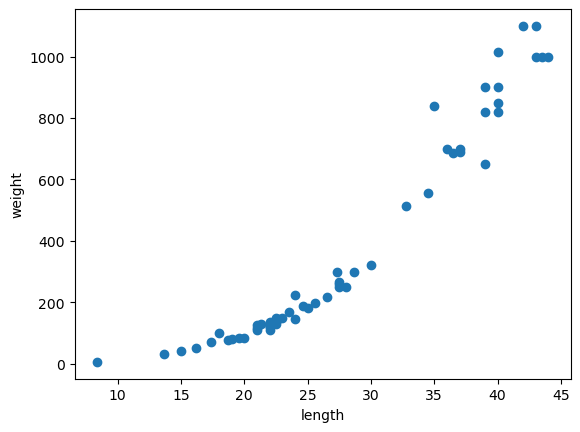

In [208]:
plt.scatter(fish['Length'], fish['Weight'])
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

## [2] 훈련, 학습 데이터 분리

In [209]:
feature = pd.DataFrame(fish['Length'], columns=['Length'])
target = fish['Weight']

print(f'{feature.shape}, {feature.ndim}D')
print(f'{target.shape}, {target.ndim}D')

(56, 1), 2D
(56,), 1D


In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

In [212]:
print(f'{x_train.shape}, {x_train.ndim}D')
print(f'{y_train.shape}, {y_train.ndim}D')

print(f'{x_test.shape}, {x_test.ndim}D')
print(f'{y_test.shape}, {y_test.ndim}D')

(44, 1), 2D
(44,), 1D
(12, 1), 2D
(12,), 1D


## [3] 모델 생성 및 학습 

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
model = LinearRegression()

In [215]:
model.fit(x_train, y_train)

LinearRegression()

In [216]:
print(f'기울기 : {model.coef_}, 절편 : {model.intercept_}')
print()
print(f'y = {model.coef_[0]}x - {abs(model.intercept_)}')

기울기 : [37.38079412], 절편 : -659.5215895691122

y = 37.38079412460246x - 659.5215895691122


In [217]:
pre_weight = model.coef_[0]* x_train + model.intercept_
pre_weight

,Length
112,704.877396
100,297.426740
109,566.568458
74,-98.809678
92,181.546278
126,966.542955
108,461.902234
127,985.233352
78,39.499261
97,237.617469


In [218]:
type(pre_weight)

pandas.core.frame.DataFrame

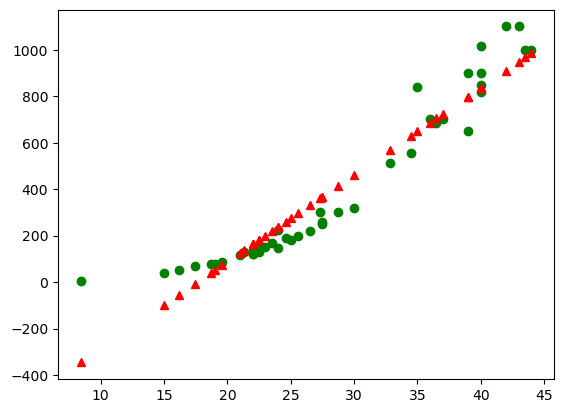

In [219]:
plt.plot(x_train, y_train, 'go')
plt.plot(x_train, pre_weight, 'r^')

plt.show()

## [3] 모델 성능 평가

In [220]:
model.score(feature, target)

0.9188824680325097

In [221]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [222]:
score_test= model.score(x_test, y_test)
print(f'score_test : {score_test}')

score_test : 0.9345624914040527


In [223]:
mse_train= mean_squared_error(y_train, pre_weight)
print(f'mse_test : {mse_train}')

mse_test : 10468.436733198105


In [224]:
mae_train= mean_absolute_error(y_train, pre_weight)
print(f'mae_test : {mae_train}')

mae_test : 77.6760281400161


r2_train= r2_score(y_train, pre_weight)
print(f'r2_score : {r2_train}')

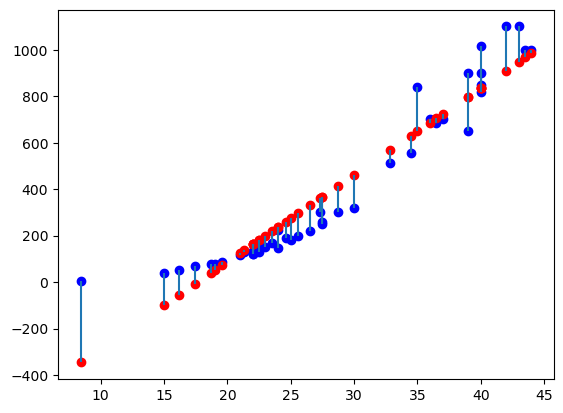

In [226]:
plt.plot(x_train, y_train,'bo')
plt.plot(x_train, pre_weight, 'ro')
plt.vlines(x_train, y_train, pre_weight) # 실제값과 예측값 사이 연결 
plt.show()

In [227]:
pre_test = model.predict(x_test)

In [228]:
pre_test = model.coef_[0]* x_test + model.intercept_

In [229]:
mse_test= mean_squared_error(y_test, pre_test)
print(f'mse_test : {mse_test}')

mse_test : 6541.962234359776


In [230]:
mae_test= mean_absolute_error(y_test, pre_test)
print(f'mae_test : {mae_test}')

mae_test : 60.83096161475516


In [231]:
r2_test= r2_score(y_test, pre_test)
print(f'r2_score : {r2_test}')

r2_score : 0.9345624914040527


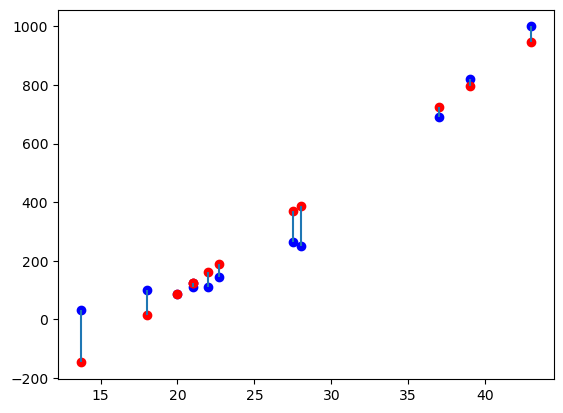

In [232]:
plt.plot(x_test, y_test,'bo')
plt.plot(x_test, pre_test, 'ro')
plt.vlines(x_test, y_test, pre_test) # 실제값과 예측값 사이 연결 
plt.show()